In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../src")

In [3]:
import SenseEmb
import SenseEmb.sense_clust as sclust

/Users/seantyh/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [4]:
skv = SenseEmb.SenseKeyedVectors.load_from_kv("../data/sense-emb-asbc5-600k.kv")

In [5]:
import umap
import hdbscan
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from tqdm.auto import tqdm
import json

In [6]:
matplotlib.rcParams["font.family"] = "Microsoft JhengHei"
matplotlib.rcParams['axes.unicode_minus']=False

In [7]:
cwn = skv.cwn

In [48]:
# sense_counts = {x:len(skv.cwn.find_all_senses(x)) 
#                 for x in tqdm(skv.cwn.get_all_lemmas()) if len(x)==1}

# fout = open("../data/sense_counts_monoword.json", "w", encoding="UTF-8")
# json.dump(sense_counts, fout)
# fout.close()

In [8]:
with open("../data/sense_counts_monoword.json", "r", encoding="UTF-8") as fin:
    sense_counts = json.load(fin)

In [9]:
sorted({(k, v) for k, v in sense_counts.items() if v>30}, key=lambda x: x[1])

[('生', 31),
 ('正', 33),
 ('條', 34),
 ('平', 35),
 ('中', 36),
 ('放', 37),
 ('清', 38),
 ('帶', 39),
 ('發', 42),
 ('空', 43),
 ('上', 45),
 ('下', 49),
 ('開', 86),
 ('打', 125)]

In [15]:
target_chs = sorted([k for k, v in sense_counts.items() if v>30], key=sense_counts.get)[-10:]

In [26]:
print(target_chs)

['中', '放', '清', '帶', '發', '空', '上', '下', '開', '打']


In [27]:
sense_vecs = []
sense_labels = []
ch_labels = []
for ch_x in target_chs:
    sdata = skv.make_sense_vectors(ch_x)
    sense_vecs.append(sdata.sense_vecs)
    sense_labels.extend(sdata.sense_labels)
    ch_labels.extend([ch_x]*len(sdata.sense_labels))
sense_vecs = np.vstack(sense_vecs)

In [28]:
sense_vecs.shape, len(sense_labels), len(ch_labels)

((377, 100), 377, 377)

In [32]:
from sklearn.decomposition import PCA
import seaborn as sns

In [55]:
sdata = skv.make_sense_vectors("生")

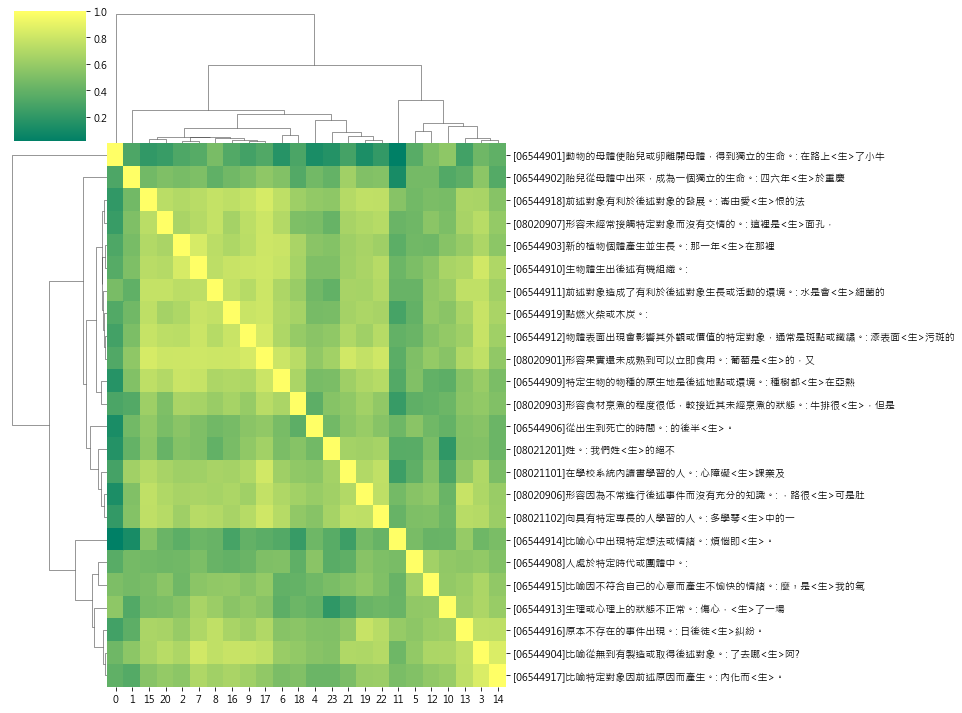

In [70]:
sclust.make_hclust(sdata)


(24, 100)
-- Cluster 0 --
1.00( 12): [06544904]比喻從無到有製造或取得後述對象。: 了去哪<生>阿?
1.00( 21): [06544915]比喻因不符合自己的心意而產生不愉快的情緒。: 麼﹖是<生>我的氣
0.98( 36): [06544913]生理或心理上的狀態不正常。: 傷心，<生>了一場
0.98( 14): [06544917]比喻特定對象因前述原因而產生。: 內化而<生>。
0.67(339): [06544901]動物的母體使胎兒或卵離開母體，得到獨立的生命。: 在路上<生>了小牛
0.56( 81): [06544908]人處於特定時代或團體中。: 
0.04( 15): [06544910]生物體生出後述有機組織。: 
0.04( 32): [06544903]新的植物個體產生並生長。: 那一年<生>在那裡


-- Cluster 1 --
1.00( 30): [06544909]特定生物的物種的原生地是後述地點或環境。: 種樹都<生>在亞熱
1.00(  5): [08020901]形容果實還未成熟到可以立即食用。: 葡萄是<生>的，又
0.92(  3): [06544912]物體表面出現會影響其外觀或價值的特定對象，通常是斑點或鐵鏽。: 漆表面<生>污斑的
0.92(  3): [08020903]形容食材烹煮的程度很低，較接近其未經烹煮的狀態。: 牛排很<生>，但是
0.76(  6): [06544911]前述對象造成了有利於後述對象生長或活動的環境。: 水是會<生>細菌的
0.70(  3): [08020907]形容未經常接觸特定對象而沒有交情的。: 這裡是<生>面孔，
0.68(  9): [06544918]前述對象有利於後述對象的發展。: 崙由愛<生>恨的法
0.59(  2): [08021102]向具有特定專長的人學習的人。: 多學琴<生>中的一
0.54(  4): [06544919]點燃火柴或木炭。: 
0.47(  5): [08021201]姓。: 我們姓<生>的絕不
0.47(  8): [08021101]在學校系統內讀書學習的人。: 心障礙<生>課業及
0.35( 78): [06544902]胎兒從母體中出來，成為一個獨立的生命。: 四六年<生>於重慶


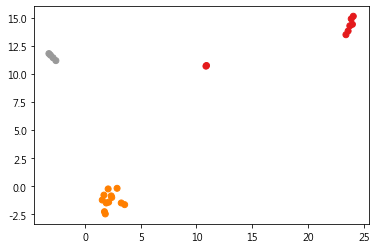

In [83]:
sdata = skv.make_sense_vectors("生")
print(sdata.sense_vecs.shape)
sclust.auto_clust(sdata, clust_min_samples=2)

(18, 100)
-- Cluster 0 --
1.00(  3): [06513401]時間或金額剛好達到特定整數。: 十二點<正>，抵達
1.00( 40): [07009801]形容符合說話者所認知的正確位置與方向。: 放得不<正>，就會
1.00( 13): [07009802]形容與參考點連成一線後完全符合的方向。: 昴宿的<正>上方看
1.00( 13): [07009804]形容特定對象的位置是上下正確的。: 將鏡子<正>著拿或
1.00(  2): [07009815]形容沒有摻雜其他成分的。: 口味不<正>時，應
1.00(  4): [07009817]將後述錯誤修改為正確的。: 清，以<正>視聽，
1.00(  5): [07009818]調整後述對象使其恢復到正確的位置。: 和屠濤<正>一<正
1.00(1360): [07009821]表動作進行中或狀態持續中。: 本現在<正>陷入一


-- Cluster 1 --
1.00(  5): [07009806]人造物約定俗成朝上或朝前且最容易觀察到的面。: 卡照片<正>反兩面
1.00( 31): [07009807]形容沒有錯誤、符合規定和法度的。: 要達到<正>知<正
1.00(  5): [07009812]贊成的意見。: 會人士<正>反參半
1.00(  2): [07009819]改變原本不適當的表情或態度。: 一跳，<正>了<正
1.00( 10): [07009820]使後述對象端正，合乎規範。: 是有利<正>家、治
1.00(1006): [07009822]表前述對象不經刻意安排而完全符合後述描述。: 性格不<正>可說是
1.00(  2): [07009823]形容比零大的。: 是一個<正>1，一
1.00(  4): [07009826]以正號代表特定意義的標誌。: 大大的<正>。
1.00(  2): [07009829]形容人的外表好看，具有美的特質。: 的都超<正>。
1.00( 12): [07009830]形容對特定對象的正面評價極高。: 畫出超<正>的3D




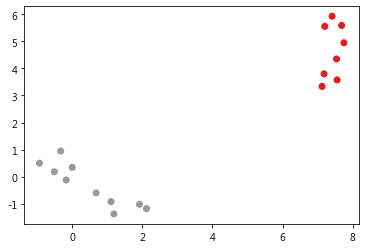

In [81]:
sdata = skv.make_sense_vectors("正")
print(sdata.sense_vecs.shape)
sclust.auto_clust(sdata, clust_min_samples=2)

(19, 100)
-- Cluster 0 --
1.00( 76): [06585910]計算身體部位的單位。: ，把整<條>手臂也
1.00( 75): [06585915]計算以布為主要材質的衣物的單位。: 爺做一<條>狼皮墊
0.88( 26): [06585911]計算動物性命的單位。: 貓有九<條>命。
0.52(138): [06585908]計算動物的單位。: 牽著一<條>牛去殺


-- Cluster 1 --
1.00( 62): [06585903]計算形狀細而長的物體的單位。: 
1.00(  2): [06585905]計算盒裝香菸包裝成條狀販賣的單位。: 稅帶一<條>菸進來
1.00(279): [06585906]計算地面上長條型的建築物或自然景觀的單位。: 外有一<條>河，很
1.00(  6): [06585907]計算流體的單位。: 發現這<條>噴射流
1.00(  4): [06585909]計算男子的單位。: 是83<條>男子漢
1.00(  7): [06585912]計算人的心思意念的單位。: 應該一<條>心，為
1.00( 27): [06585916]計算船隻的單位。: 腳踏兩<條>船。
1.00( 48): [06585919]計算線狀物體的單位。: ，這三<條>線卻因
1.00( 49): [06585921]計算顯示在特定平面上的線條或細長的紋路痕跡的單位。: 下畫了<條>粗線。
1.00(  3): [06585925]計算線索的單位。: 拋出幾<條>線索。
1.00(  8): [06585931]計算短篇文章的單位。: 過26<條>短文，
0.88(482): [06585924]計算行進的路線的單位。: 走那一<條>高速公
0.80(  5): [06585933]計算歌曲的單位。: 
0.06(193): [06585930]計算法規結構分類的單位，在「節」之下、「項」之上。: 批准兩<條>法律以
0.06(129): [06585928]計算以條列式呈現出的內容的單位。: 內」這<條>規定給




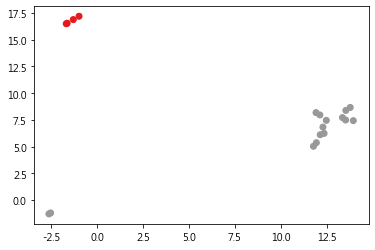

In [84]:
sdata = skv.make_sense_vectors("條")
print(sdata.sense_vecs.shape)
sclust.auto_clust(sdata, clust_min_samples=2)

(62, 100)
-- Cluster -1 --
0.00(  9): [06721025]擁有並使用後述廠牌的交通工具。: 怎麼會<開>凱迪拉


-- Cluster 0 --
1.00(  4): [06721064]租用旅館房間，以進行性行為。: 到旅館<開>房間，
1.00( 62): [06721038]創立後述機構。: 
1.00( 33): [06721039]經營後述商店或機構。: 永吉路<開>醫院。


-- Cluster 1 --
1.00(  8): [06721049]開闢後述道路或通道。: 西側又<開>了第二
1.00(  8): [06721050]比喻拓展後述知識領域或經驗。: 實能廣<開>眼界。
1.00(  2): [06721054]開創後述為特定對象所接受的固定事件。: 你們要<開>什麼主
1.00(  3): [06721058]撞球比賽中，每一局開始擊出第一球。: 手總共<開>了三球
1.00(100): [06721072]形容有花植物的花朵長出並舒展。: 花朵朵<開>，把他
1.00( 14): [06721074]形容方向多、距離遠。: 上散了<開>去，像
1.00(  2): [06721016]執行並取得特定檔案內容。: 將會另<開>視窗到
1.00( 10): [06721017]利用開關裝置使機器運作。: 把電筒<開>著，照
1.00(  3): [06721019]利用開關裝置調節前述對象。: 把喇叭<開>大聲一
1.00( 13): [06721021]扣動扳機，發射子彈。: 果阿賢<開>了四槍
1.00(118): [06721022]駕駛後述交通工具。: 也要學<開>飛機。
1.00( 32): [06721023]交通工具往特地方向行駛。: 車子要<開>向何方
1.00(  3): [06721032]交易談判過程中，買方或賣方提出交易價格。: 最少要<開>多少才
1.00(  5): [06721040]商店或機構在固定時段內開始營運或維持營運。: 之後才<開>所以中
1.00( 23): [06721001]移動封閉門窗的裝置物，使其空間的出入口不被封閉。: 把窗戶<開>了一點
1.00( 41): [06721003]形容門窗或容器的開口或出入口不被封閉。: 那扇半<開>半掩的
1.00

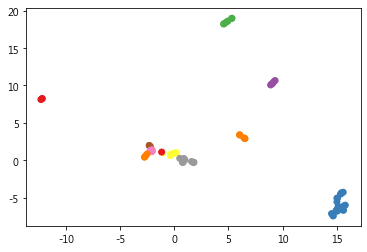

In [93]:
sdata = skv.make_sense_vectors("開")
print(sdata.sense_vecs.shape)
sclust.auto_clust(sdata, clust_min_samples=2)

(34, 100)
-- Cluster 0 --
1.00( 12): [06749215]比喻將事物安置於抽象的範圍裡。: 論語》<放>在生活
1.00(176): [06749216]比喻將前述抽象對象放置在一個抽象位置上。: 把自己<放>在全國
0.68(  4): [06749237]將前述對象歸類於後述類別。: 術品，<放>在設計
0.59( 11): [06749226]比喻將精神或情感集中在特定對象上。: 專注地<放>精神和


-- Cluster 1 --
1.00(  3): [06749208]釋出資金，使其在市面上流通。: 必須要<放>資本、
1.00(300): [06749214]將物品安置於特定位置上。: 小魚池<放>的魚多
1.00( 73): [06749217]比喻事件發生在特定地點。: 的會面<放>在了四
0.88( 66): [06749201]將手由原來緊握的物品上鬆開。: 始終不<放>。
0.79( 13): [06749220]將金錢存在特定金融機構。: 半的錢<放>在銀行


-- Cluster 2 --
1.00( 67): [06749202]解除對後述對象的約束，使其得到自由。: 道：「<放>了牠吧
1.00(  3): [06749221]比喻擱置不使用。: 件衣服<放>著不穿
1.00(  5): [06749223]在生物上施用具有特定效能的藥物或毒物上。: 你給人<放>了蠱，


-- Cluster 3 --
1.00(  3): [06749206]使流體由容器中流出。: 洗完澡<放>洗澡水
1.00( 18): [06749207]在有特定功能的人造物中注入水以進行該項功能。: 晚飯，<放>你的洗
1.00( 23): [06749224]製作特定物品時，加進後述材料。: 要不要<放>一點兒
1.00(  2): [06749225]比喻在作品中加入後述成份。: 一課裡<放>一些小
1.00(  2): [06749228]將捲起或收起的物體解開，使其長度可以展開。: ，藉以<放>長線釣
1.00( 25): [06749230]比喻對特定事物不再在意。: 教人要<放>得下，
1.00( 18): [06749231]點燃後述含有火藥的人造物，使其發出聲音或光。: 典，不<放>鞭炮、
1.00(

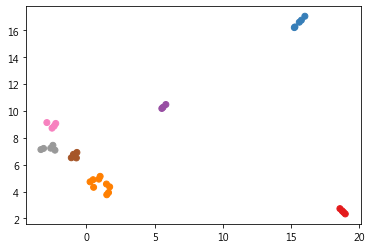

In [94]:
sdata = skv.make_sense_vectors("放")
print(sdata.sense_vecs.shape)
sclust.auto_clust(sdata, clust_min_samples=2)